In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn import cross_validation

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'svg',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [49]:
df1 = pd.read_csv('Data/Auto.csv', na_values='?')
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 29.1+ KB


### Figure 5.2 - Validation Set Approach
What is going on here after polynomial degree 7?

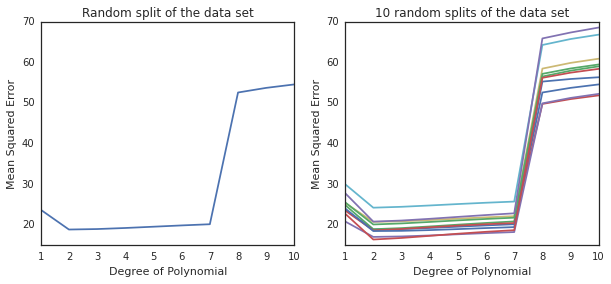

In [68]:
t_prop = 0.5
p_order = np.arange(1,11)
r_state = np.arange(0,10)

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size,r_state.size))

regr = skl_lm.LinearRegression()

for (i,j),v in np.ndenumerate(Z):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(df1.horsepower.reshape(-1,1),
                                                                         df1.mpg.reshape(-1,1),
                                                                         test_size=t_prop,
                                                                         random_state=Y[i,j])
    regr.fit(np.append(X_train, X_train**X[i,j], 1), y_train)
    pred = regr.predict(np.append(X_test, X_test**X[i,j], 1))
    Z[i,j]= mean_squared_error(y_test, pred)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

ax1.plot(X.T[0],Z.T[0])
ax1.set_title('Random split of the data set')

ax2.plot(X,Z)
ax2.set_title('10 random splits of the data set')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(15,70)
    ax.set_xlabel('Degree of Polynomial');

### Figure 5.4

In [62]:
p_order = np.arange(1,11)
r_state = np.arange(0,10)

# LeaveOneOut CV
regr = skl_lm.LinearRegression()
loo = cross_validation.LeaveOneOut(392)
scores = list()

for i in p_order:
    score = cross_validation.cross_val_score(regr, 
                                              np.append(df1['horsepower'].reshape(-1,1),
                                                        df1['horsepower'].reshape(-1,1)**i, 1),
                                              df1.mpg, cv=loo, scoring='mean_squared_error').mean()
    scores.append(score)

In [63]:
# k-fold CV
regr = skl_lm.LinearRegression()
X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size,r_state.size))

for (i,j),v in np.ndenumerate(Z):
    kf_10 = cross_validation.KFold(392, n_folds=10, random_state=Y[i,j])
    Z[i,j] = cross_validation.cross_val_score(regr, 
                                              np.append(df1['horsepower'].reshape(-1,1),
                                                        df1['horsepower'].reshape(-1,1)**X[i,j], 1),
                                              df1.mpg, cv=kf_10, scoring='mean_squared_error').mean()    

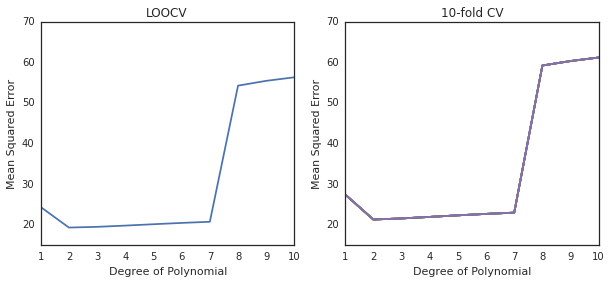

In [65]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Note: cross_val_score() method return negative values for the scores.
# https://github.com/scikit-learn/scikit-learn/issues/2439

ax1.plot(p_order, np.array(scores)*-1)
ax1.set_title('LOOCV')

ax2.plot(X,Z*-1)
ax2.set_title('10-fold CV')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(15,70)
    ax.set_xlabel('Degree of Polynomial');